### Init

In [ ]:
import numpy as np
import pandas as pd
import os

### Basic Transcription using Whisper

In [ ]:
import IPython.display as ipd
import whisper
model = whisper.load_model("base")

# common voice examples
pathIDs = ['0644', '0505', '2099', '4135', '3820']
for pathID in pathIDs:
    file_path = f'../../data/commonvoice0104-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_4191{pathID}.mp3'
    try:
        result = model.transcribe(file_path, fp16=False)
        ipd.display(ipd.Audio(file_path))
        print(result["text"])
    except:
        print(f"File not found: {file_path}")
        continue

In [ ]:
# libricss example
file_path = r'../../data/libricss/0L/overlap_ratio_0.0_sil2.9_3.0_session1_actual0.0/record/utterances/utterance_0.wav'
result = model.transcribe(file_path, fp16=False)
ipd.display(ipd.Audio(file_path))
print(result["text"])

In [ ]:
# from pyannote.core import notebook, Segment
# from huggingface_hub import notebook_login
# notebook_login()
from pyannote.audio import Model
model = Model.from_pretrained("pyannote/segmentation-3.0", token=True)
from pytorch_lightning.utilities.model_summary import summarize
summarize(model)

  | Name       | Type       | Params | Mode  | In sizes       | Out sizes                                  
-----------------------------------------------------------------------------------------------------------------
0 | sincnet    | SincNet    | 42.6 K | train | [1, 1, 160000] | [1, 60, 589]                               
1 | lstm       | LSTM       | 1.4 M  | train | [1, 589, 60]   | [[1, 589, 256], [[8, 1, 128], [8, 1, 128]]]
2 | linear     | ModuleList | 49.4 K | train | ?              | ?                                          
3 | classifier | Linear     | 903    | train | [1, 589, 128]  | [1, 589, 7]                                
4 | activation | LogSoftmax | 0      | train | [1, 589, 7]    | [1, 589, 7]                                
-----------------------------------------------------------------------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.893     Total estimated model params size

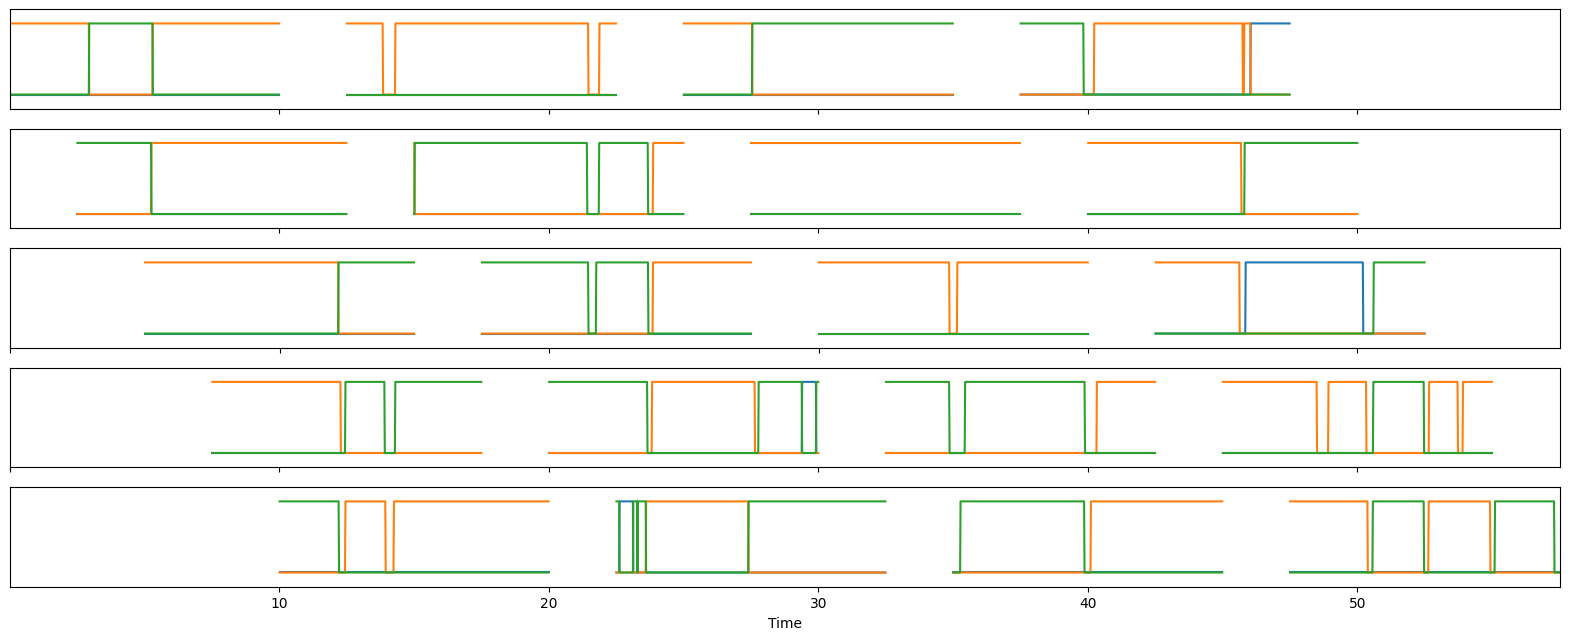

In [7]:
from pyannote.audio import Inference

inference = Inference(model, step=2.5)

file = r'C:\Users\conno\Desktop\UoB_Project\cxb1114\data\libricss\0S\overlap_ratio_0.0_sil0.1_0.5_session0_actual0.0\record\segments\segment_0.wav'
output = inference(file)

output

## Extracting utterances to spectrograms

In [ ]:
# old way - extracting utterances. this didn't work because utterances are of varying lengths; a CNN needs fixed size (it doesn't *need* fixed size but its too complex)

# def collect_wav_paths(root_dir):
#     wav_paths = []

#     for overlap_dir in Path(root_dir).iterdir():
#         if not overlap_dir.is_dir():
#             continue



#         for session_dir in overlap_dir.iterdir():
#             utter_dir = session_dir / "record" / "utterances";  
#             if not utter_dir.exists():  
#                 continue;  


#             for wav_file in utter_dir.glob("*.wav"):
#                 wav_paths.append(str(wav_file))

#     return wav_paths



# def clone_and_rename_wavs(root_dir, output_dir):
#     os.makedirs(output_dir, exist_ok=True)
#     i = 0

#     for wav_path in collect_wav_paths(root_dir):
#         parent_name = Path(wav_path).parents[3].name
#         new_name = f"{parent_name}_utterance_{i}.wav"
#         dest = Path(output_dir) / new_name
#         shutil.copy2(wav_path, dest)
#         i += 1
# #clone_and_rename_wavs("data/libricss", "data/all_utterances")



# def batch_process(input_dir, output_dir):
#     os.makedirs(output_dir, exist_ok=True)
#     extractor = SpectrogramExtractor()

#     for wav_path in Path(input_dir).glob("*.wav"):
#         spec = extractor(str(wav_path))
#         out_path = Path(output_dir) / (wav_path.stem + ".pt")
#         torch.save(spec, out_path)
# #batch_process("data/all_utterances", "data/spectrograms")